
# CODE TO PREDICT ACCEPTANCE CHANCE OF UNIVERSITY ADMISSION




# PROBLEM STATEMENT

- In this project, a regression model is developed to predict the probability of being accepted for Graduate school.
- Data Source: https://www.kaggle.com/mohansacharya/graduate-admissions
- Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

- The dataset contains the following parameters: 
    - GRE Scores ( out of 340 ) 
    - TOEFL Scores ( out of 120 ) 
    - University Rating ( out of 5 ) 
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    - Undergraduate GPA ( out of 10 ) 
    - Research Experience ( either 0 or 1 ) 
    - Chance of Admit ( ranging from 0 to 1 )

# Step 1: Data reading and insight 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('seaborn-deep')

import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
seed = 12
np.random.seed(seed)

from datetime import date

In [2]:
admission_df = pd.read_csv('Admission.csv')
admission_df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# important funtions
def datasetShape(df):
    rows, cols = df.shape
    print("The dataframe has",rows,"rows and",cols,"columns.")
    
# select numerical and categorical features
def divideFeatures(df):
    numerical_features = admission_df.select_dtypes(include=[np.number]).drop('Admission Chance', axis=1)
    categorical_features = admission_df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [4]:
# check dataset shape
datasetShape(admission_df)

# check for duplicates
if(len(admission_df) == len(admission_df['Serial No.'].unique())):
    print("No duplicates found!!")
else:
    print("Duplicates occuring")

The dataframe has 400 rows and 9 columns.
No duplicates found!!


In [5]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Step 2: EDA

In [7]:
# check null values

pd.DataFrame(admission_df.isnull().sum(), columns=["Null Count"]).style.background_gradient(cmap='Blues')

,Null Count
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Admission Chance,0


<AxesSubplot:>

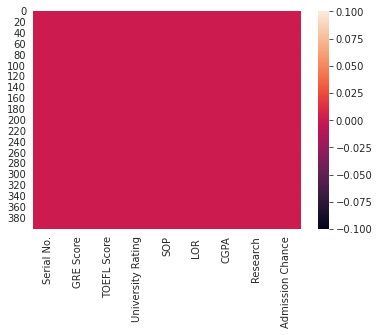

In [8]:
sns.heatmap(admission_df.isnull())

In [9]:
numerical_features, categorical_features = divideFeatures(admission_df)

There are no categorical features

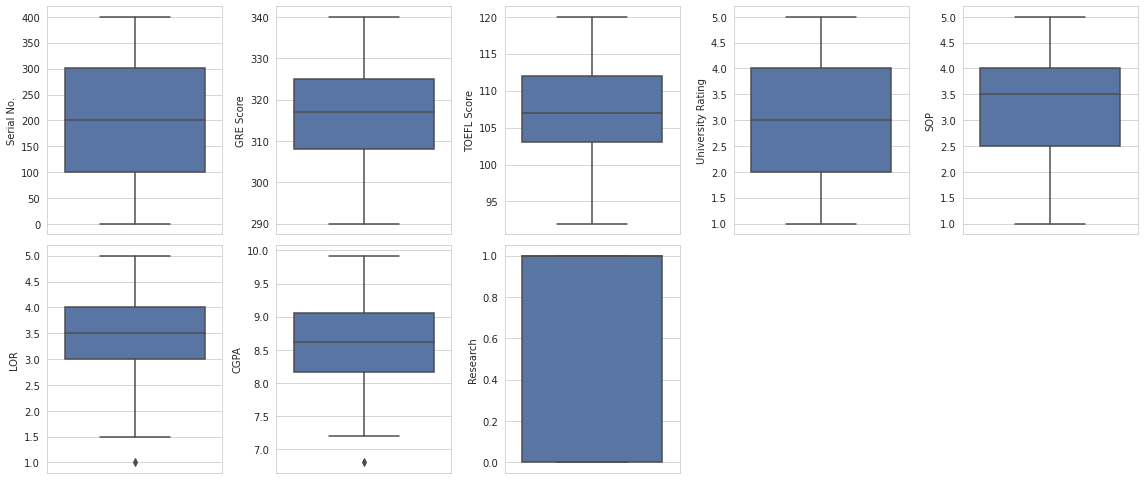

In [10]:
# boxplots of numerical features for outlier detection

fig = plt.figure(figsize=(16,30))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])
plt.tight_layout()
plt.show()

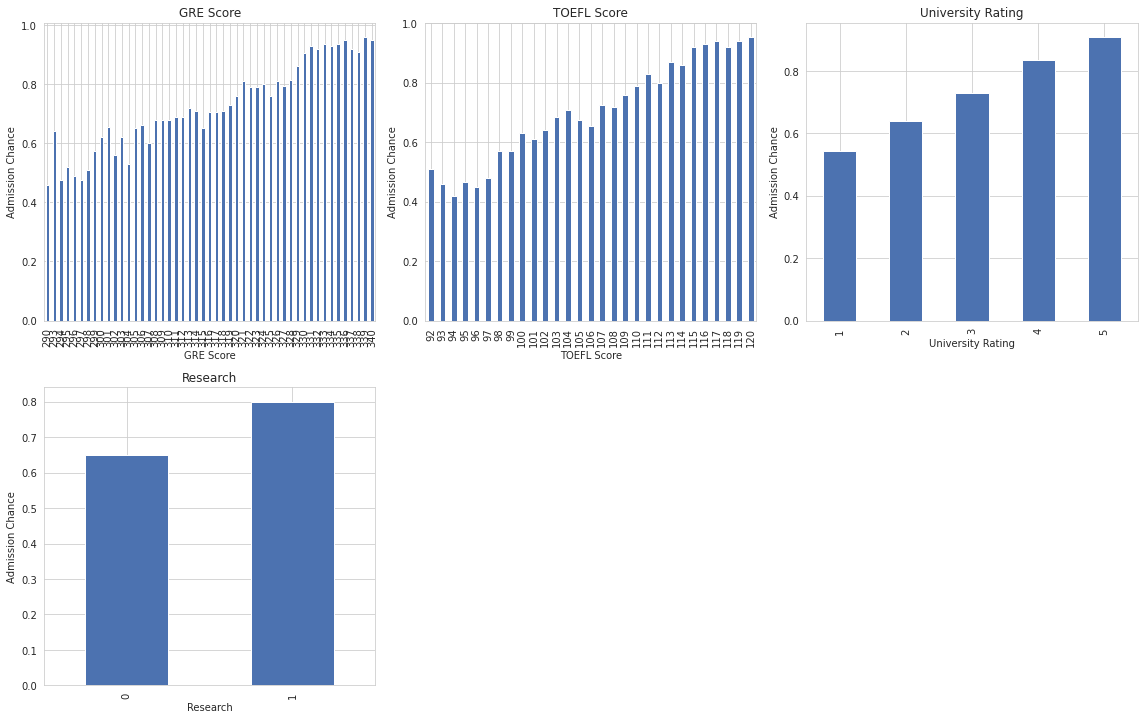

In [11]:
# plotting discrete numerical features for bar plot patterns

discrete_features = numerical_features.select_dtypes(include=['integer']).drop('Serial No.', axis=1)

fig = plt.figure(figsize=(16,30))
for i,feature in enumerate(discrete_features.columns):
    fig.add_subplot(6, 3, i+1)
    data=admission_df.copy()
    data.groupby(feature)['Admission Chance'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Admission Chance')
    plt.title(feature)
plt.tight_layout()
plt.show()

Distribution check of the target variable for the linear regression assumption

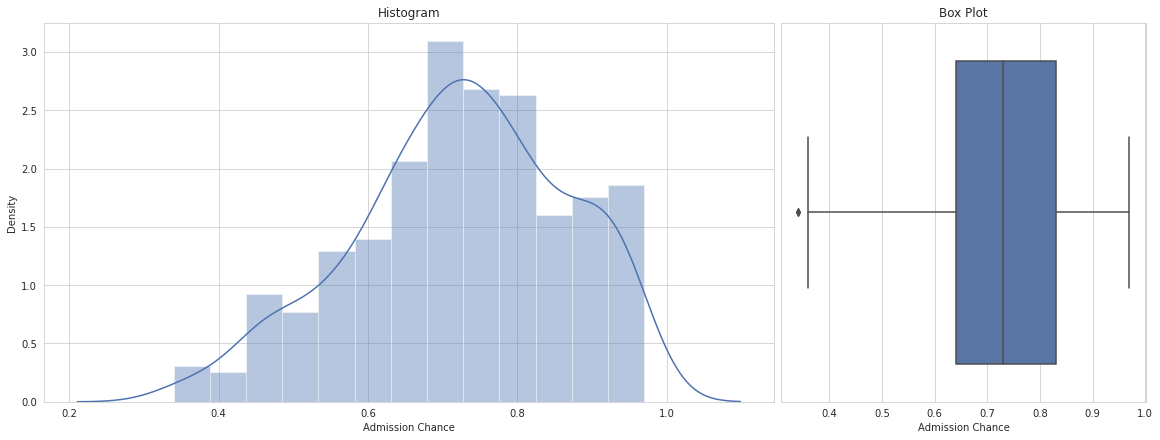

In [12]:
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True, figsize=(16,6))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(admission_df.loc[:,'Admission Chance'], norm_hist=True, ax = ax1)
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(admission_df.loc[:,'Admission Chance'], orient='v', ax = ax3)
plt.show()

- Our target variable, 'Admission Chance' is not normally distributed.
- Our target variable is left-skewed.
- There is only one outlier in the variable.

Outlier analysis will be done for Admission Chance feature to make it as normally distributed.

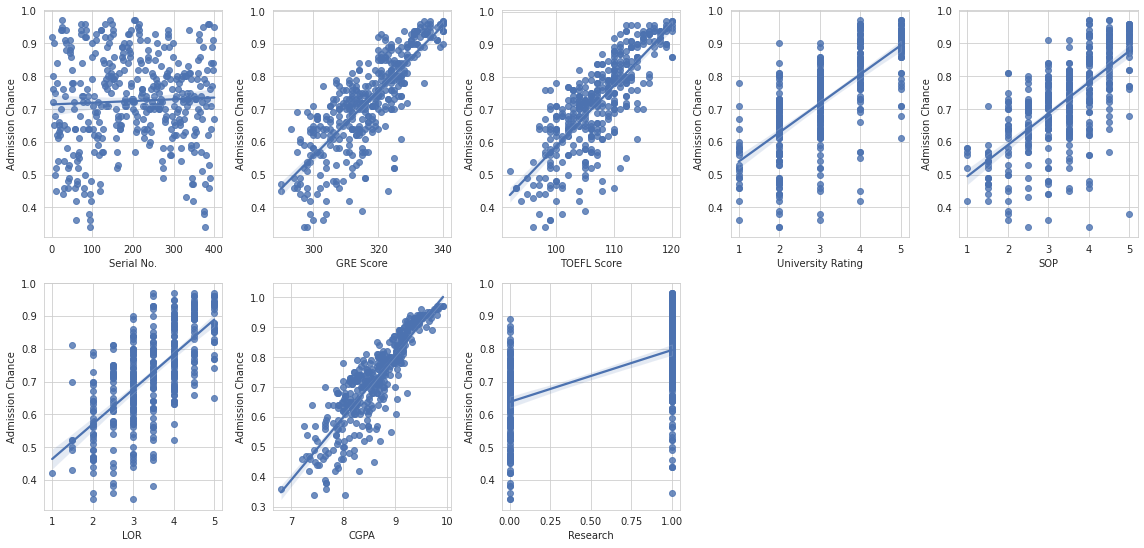

In [13]:
# scatterplot for correlation analysis of features with Admission chance

fig = plt.figure(figsize=(16,30))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(8, 5, i+1)
    sns.regplot(x=numerical_features.iloc[:,i],y=admission_df['Admission Chance'])
plt.tight_layout()
plt.show()

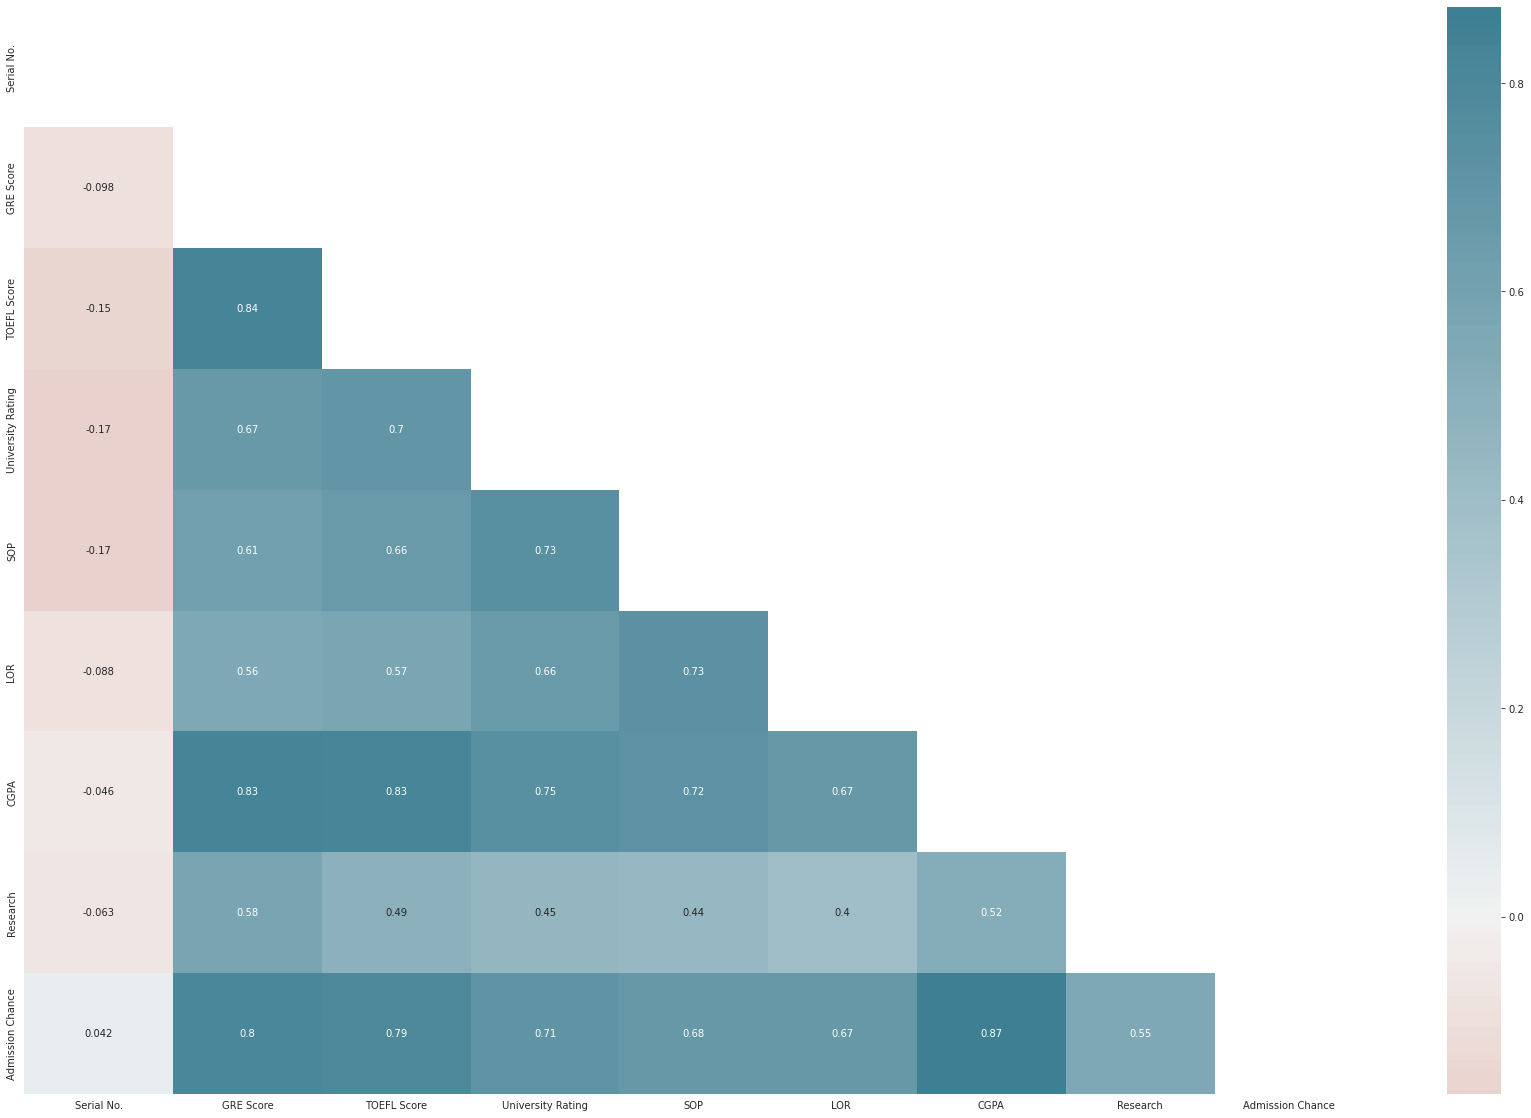

In [14]:
# correlation heatmap for all features

plt.figure(figsize = (30,20))
mask = np.zeros_like(admission_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(admission_df.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0)
plt.show()

# Step 3: Data Cleaning

In [15]:
# drop the Serial No.
admission_df.drop('Serial No.', axis=1, inplace=True)

# drop the duplicate rows
admission_df.drop_duplicates(inplace=True)
datasetShape(admission_df)

The dataframe has 400 rows and 8 columns.


TIP

If the distribution is skewed we can replace missing values with median or mode (for categorical features)

# Step 4: Data Preparation

Outlier Treatment:

Treating with the output target feature and other numerical features, which are skewed. We will take log of the feature values using np.log1p()

In [16]:
# extract all skewed features
temp_numerical_features, temp_categorical_features = divideFeatures(admission_df)
# remove categorical features stored as int
temp_numerical_features.drop(['University Rating', 'Research'], axis=1, inplace=True)
skewed_features = temp_numerical_features.apply(lambda x: x.skew()).sort_values(ascending=False)

In [17]:
# transform skewed features
for feat in skewed_features.index:
    if skewed_features.loc[feat] > 0.5:
        admission_df[feat] = np.log1p(admission_df[feat])
        #admission_test[feat] = np.log1p(admission_test[feat])

Feature binning (used for the transformation of a continuous or numerical variable into a categorical feature)

In [18]:
# admission_df Research in 2 bins, and University Rating in 5 bins (repeats the same code for the test set, if provided)
admission_df['Research'].replace([0,1], ['Novice', 'Exp'], inplace=True)
admission_df['University Rating'].replace([1,2,3,4,5], ['Poor', 'Poor', 'Fair', 'Average', 'Average'], inplace=True)

Create dummy features

In [19]:
# extract numerical and categorical for dummy and scaling later
numerical_features, categorical_features = divideFeatures(admission_df)
for feat in categorical_features.columns:
    dummyVars = pd.get_dummies(admission_df[feat], drop_first=True, prefix=feat+"_")
    admission_df = pd.concat([admission_df, dummyVars], axis=1)
    admission_df.drop(feat, axis=1, inplace=True)

# Step 5: Data Modeling

Split Train-Test Data

In [20]:
# shuffle samples
df_shuffle = admission_df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [21]:
df_y = df_shuffle.pop('Admission Chance')
df_X = df_shuffle

# split into train dev and test
X_train, X_test, y_train, y_test = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed)
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 280 records out of 400 which is 70%
Test set has 120 records out of 400 which is 30%


Feature Scaling

In [22]:
from sklearn.feature_selection import RFE
import sklearn.linear_model as sklm

In [23]:
scaler = skp.StandardScaler()

# apply scaling to all numerical variables except dummy variables as they are already between 0 and 1
X_train[numerical_features.columns] = scaler.fit_transform(X_train[numerical_features.columns])

# scale test data with transform()
X_test[numerical_features.columns] = scaler.transform(X_test[numerical_features.columns])


# view sample data
X_train.describe()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,University Rating__Fair,University Rating__Poor,Research__Novice
count,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,280.000000,280.000000,280.000000
mean,-1.992057e-15,5.963484e-16,-1.871519e-16,1.839798e-16,-1.129255e-15,0.328571,0.325000,0.453571
std,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,1.001791e+00,0.470535,0.469213,0.498731
min,-2.384267e+00,-2.435098e+00,-2.379777e+00,-2.129494e+00,-3.010609e+00,0.000000,0.000000,0.000000
25%,-6.246603e-01,-6.071424e-01,-8.823894e-01,-4.639680e-01,-7.320407e-01,0.000000,0.000000,0.000000
50%,3.519213e-02,-1.086091e-01,1.158693e-01,9.120739e-02,4.965807e-02,0.000000,0.000000,0.000000
75%,6.950445e-01,7.222799e-01,6.149987e-01,6.463828e-01,7.814612e-01,1.000000,1.000000,1.000000
max,2.014749e+00,2.051702e+00,1.613257e+00,1.756734e+00,2.178540e+00,1.000000,1.000000,1.000000


RFE Feature Selection

In [24]:
# Running RFE to extract top 4 features
lm = sklm.LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)
rfeCols = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfeCols]
X_test_rfe = X_test[rfeCols]
print("Selected features by RFE are",list(rfeCols))

Selected features by RFE are ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'University Rating__Fair', 'University Rating__Poor', 'Research__Novice']


Ridge & Lasso Regression

In [25]:
# plotting mean test and train scores with alpha 
import operator
def plotCvResults(model_cv):
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
    plt.plot(np.log1p(cv_results['param_alpha']), cv_results['mean_train_score'])
    plt.plot(np.log1p(cv_results['param_alpha']), cv_results['mean_test_score'])
    plt.xlabel('log1p(alpha)')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and log1p(alpha)")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()

In [26]:
# display parameters
def bestParams(model):
    print("Best Alpha for Regularized Regression:",model.get_params()['alpha'])
    model_parameters = [abs(x) for x in list(model.coef_)]
    model_parameters.insert(0, model.intercept_)
    model_parameters = [round(x, 3) for x in model_parameters]
    cols = X_train_rfe.columns
    cols = cols.insert(0, "constant")
    model_coef = sorted(list(zip(cols, model_parameters)), key=operator.itemgetter(1), reverse=True)[:4]
    print("Top 4 Model parameters (excluding constant) are:")
    for p,c in model_coef:
        print(p)

def modelR2AndSpread(model):
    y_train_pred = model.predict(X_train_rfe)
    print("Train r2:",skm.r2_score(y_true=y_train, y_pred=y_train_pred))
    y_test_pred = model.predict(X_test_rfe)
    print("Test r2:",skm.r2_score(y_true=y_test, y_pred=y_test_pred))
    print('Root Mean Square Error train: ' + str(np.sqrt(skm.mean_squared_error(y_train, y_train_pred))))
    print('Root Mean Square Error test: ' + str(np.sqrt(skm.mean_squared_error(y_test, y_test_pred)))) 

    fig = plt.figure(figsize=(16,10))
    plt.suptitle("Linear Regression Assumptions", fontsize = 16)

    # plot error spread
    fig.add_subplot(2, 2, 1)
    sns.regplot(y_train, y_train_pred)
    plt.title('y_train vs y_train_pred spread', fontsize = 14)
    plt.xlabel('y_train', fontsize = 12)
    plt.ylabel('y_train_pred', fontsize = 12)      

    fig.add_subplot(2, 2, 2)
    sns.regplot(y_test, y_test_pred)
    plt.title('y_test vs y_test_pred spread', fontsize = 14)
    plt.xlabel('y_test', fontsize = 12)
    plt.ylabel('y_test_pred', fontsize = 12)      

    # plot residuals for linear regression assumption
    residuals_train = y_train - y_train_pred
    fig = plt.figure(figsize=(16,6))
    fig.add_subplot(2, 2, 3)
    sns.distplot(residuals_train)
    plt.title('residuals between y_train & y_train_pred', fontsize = 14)
    plt.xlabel('residuals', fontsize = 12)

    fig.add_subplot(2, 2, 4)
    residuals_test = y_test - y_test_pred
    sns.distplot(residuals_train)
    plt.title('residuals between y_test & y_test_pred', fontsize = 14)
    plt.xlabel('residuals', fontsize = 12)
    plt.show()       

Ridge regression

In [27]:
lmr = sklm.Ridge(alpha=0.001)
lmr.fit(X_train_rfe, y_train)

# predict
y_train_pred = lmr.predict(X_train_rfe)
print("Train r2:",skm.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lmr.predict(X_test_rfe)
print("Test r2:",skm.r2_score(y_true=y_test, y_pred=y_test_pred))

Train r2: 0.8047681028340543
Test r2: 0.7898732204831395


Fitting 5 folds for each of 11 candidates, totalling 55 fits


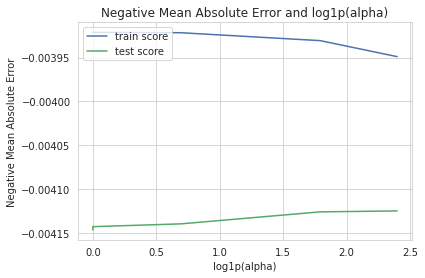

In [28]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.03, 0.05, 0.1, 0.5, 1.0, 5.0, 10]}
ridge = sklm.Ridge()

# cross validation
model_cv_ridge = skms.GridSearchCV(estimator = ridge, n_jobs=-1, param_grid = params, 
                             scoring= 'neg_mean_squared_error', cv = 5, 
                             return_train_score=True, verbose = 3)            
model_cv_ridge.fit(X_train_rfe, y_train)
plotCvResults(model_cv_ridge)

In [29]:
# verify log1p value for best selected alpha by GridSearch
print(model_cv_ridge.best_params_['alpha'])
print(np.log1p(model_cv_ridge.best_params_['alpha']))

10
2.3978952727983707


In the above plot, we can see that after 2.39, the negative mean squared error started decreasing.
Hence, alpha for Ridge Regression is selected as 10

Lasso Regression

In [30]:
lml = sklm.Lasso(alpha=0.01)
lml.fit(X_train_rfe, y_train)

# predict
y_train_pred = lml.predict(X_train_rfe)
print("Train r2:",skm.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lml.predict(X_test_rfe)
print("Test r2:",skm.r2_score(y_true=y_test, y_pred=y_test_pred))

Train r2: 0.7919656974794393
Test r2: 0.7851863379418963


Fitting 5 folds for each of 9 candidates, totalling 45 fits


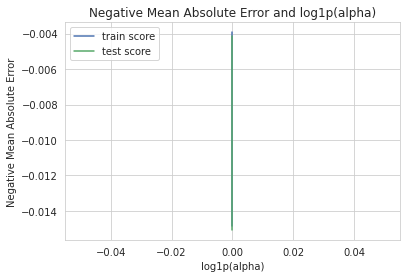

In [31]:
# list of alphas to tune
params = {'alpha': [0.00005, 0.0001, 0.0005, 0.0008, 0.001, 0.005, 0.01, 0.05, 0.1]}
lasso = sklm.Lasso()

# cross validation
model_cv_lasso = skms.GridSearchCV(estimator = lasso, n_jobs=-1, param_grid = params, 
                             scoring= 'neg_mean_squared_error', cv = 5, 
                             return_train_score=True, verbose = 3)            
model_cv_lasso.fit(X_train_rfe, y_train)
plotCvResults(model_cv_lasso)

In [32]:
# verify log1p value for best selected alpha by GridSearch
print(model_cv_lasso.best_params_['alpha'])
print(np.log1p(model_cv_lasso.best_params_['alpha']))

0.0008
0.0007996801705643322


In the above plot, we can see that after or before 0.00079, the negative mean squared error is 0 and overlapping for both train and test.
Hence, alpha for Lasso Regression is selected as 0.00079

# Step 6: Model Evaluation

Ridge Model Evaluation

In [33]:
alpha = model_cv_ridge.best_params_['alpha']
ridge_final = sklm.Ridge(alpha=alpha)

ridge_final.fit(X_train_rfe, y_train)
bestParams(ridge_final)

Best Alpha for Regularized Regression: 10
Top 4 Model parameters (excluding constant) are:
constant
CGPA
TOEFL Score
GRE Score


Train r2: 0.8038381887496356
Test r2: 0.7882000641691577
Root Mean Square Error train: 0.06294539937466866
Root Mean Square Error test: 0.0656943921436241


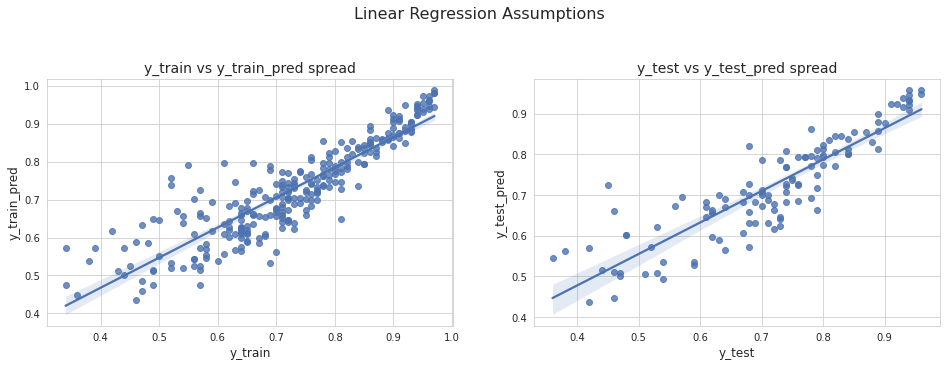

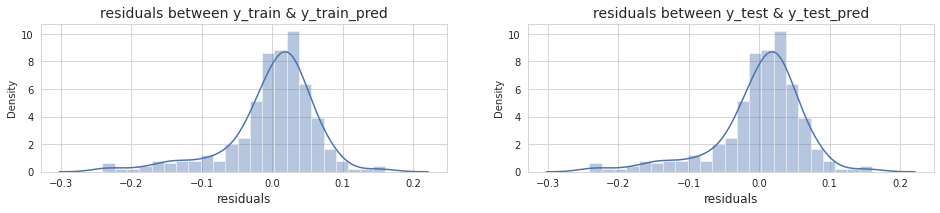

In [34]:
# r2 score for selected model
modelR2AndSpread(ridge_final)

Lasso Model Evaluation

In [35]:
alpha = model_cv_lasso.best_params_['alpha']
lasso_final = sklm.Lasso(alpha=alpha)

lasso_final.fit(X_train_rfe, y_train)
bestParams(lasso_final)

Best Alpha for Regularized Regression: 0.0008
Top 4 Model parameters (excluding constant) are:
constant
CGPA
TOEFL Score
GRE Score


Train r2: 0.8040531980935954
Test r2: 0.7910435400873862
Root Mean Square Error train: 0.06291089327095009
Root Mean Square Error test: 0.06525191885378998


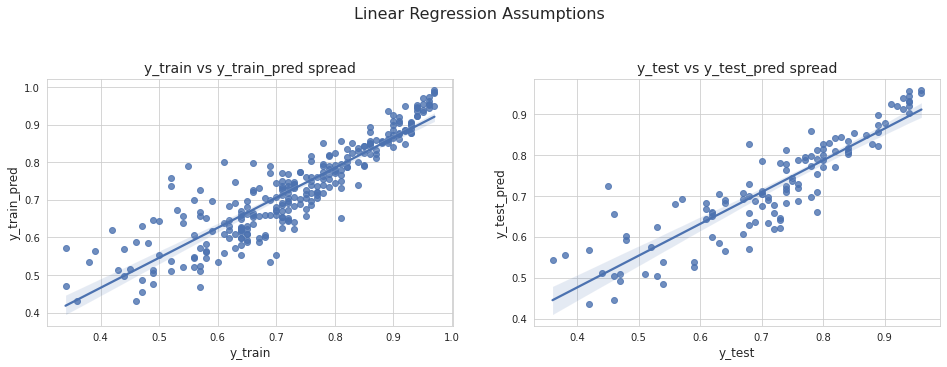

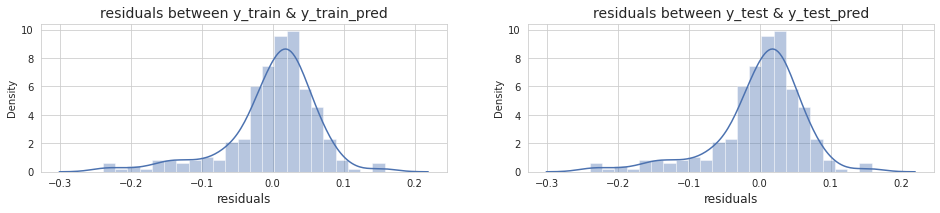

In [36]:
# r2 score for selected model
modelR2AndSpread(lasso_final)

Lasso regression model win!!!!!

Best Alpha for Regularized Regression: 0.0008

Top 4 Model parameters (excluding constant) are:


- CGPA
- TOEFL Score
- GRE Score

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e0e32519-1b11-44a9-920f-b0a81291dd7d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>